In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Datasets/main/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.duplicated().sum()

1

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [59]:
df= df.drop_duplicates()

In [33]:
len(df[df.duplicated()])

0

In [58]:
df.duplicated().sum()

0

In [61]:
df.shape

(1337, 7)

In [36]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)


In [37]:
df.age.value_counts()

18    69
19    67
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [38]:
df.age.isna().sum()

0

In [39]:
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [40]:
df.bmi.value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
40.7     1
19.2     1
38.7     1
41.7     1
19.3     1
Name: bmi, Length: 275, dtype: int64

In [41]:
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [42]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [43]:
df.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()

In [76]:
model.fit(df[['bmi']],df['expenses'])

LinearRegression()

In [77]:
m = model.coef_
b = model.intercept_

In [82]:
model_pred_expenses= model.predict(df[['bmi']])

In [83]:
model_pred_expenses

array([12188.64301299, 14515.08588997, 14199.63600834, ...,
       15737.45418126, 11360.58707373, 12661.81783543])

In [85]:
actual_expenses = df['expenses']

In [87]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [88]:
mean_squared_error(actual_expenses,model_pred_expenses)

140768692.14691105

In [89]:
mean_absolute_error(actual_expenses,model_pred_expenses)

9173.443654719127

In [90]:
np.sqrt(mean_squared_error(actual_expenses,model_pred_expenses))

11864.598271619274

In [91]:
r2_score(actual_expenses,model_pred_expenses)

0.03945670999381046

In [92]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual_expenses,model_pred_expenses)


150.5938403093773

In [93]:
import matplotlib.pyplot as plt

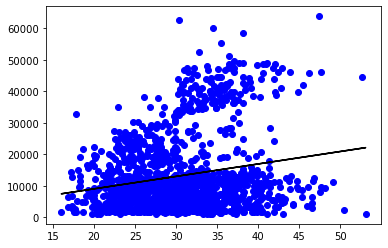

In [95]:
plt.scatter(df["bmi"],df["expenses"], color='blue')
plt.plot(df["bmi"],model_pred_sales, color='black')

plt.show()